# Lending Club loan data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando os dados

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


Análise exploratória de dados

Text(0.5, 0, 'Score FICO')

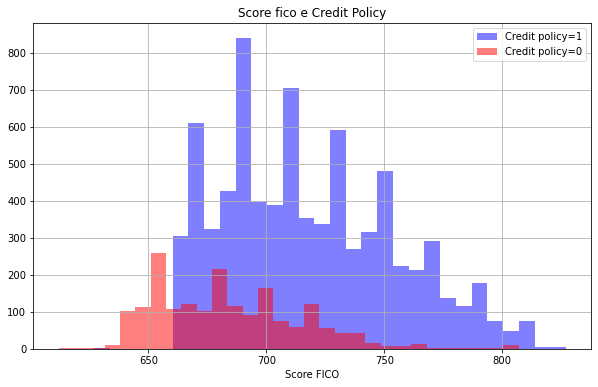

In [21]:
plt.figure(figsize=(10, 6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5, bins=30, 
                                        color='blue', label='Credit policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5, bins=30, 
                                        color='red', label='Credit policy=0')
plt.title('Score fico e Credit Policy')
plt.legend()
plt.xlabel('Score FICO')

Text(0.5, 0, 'Score FICO')

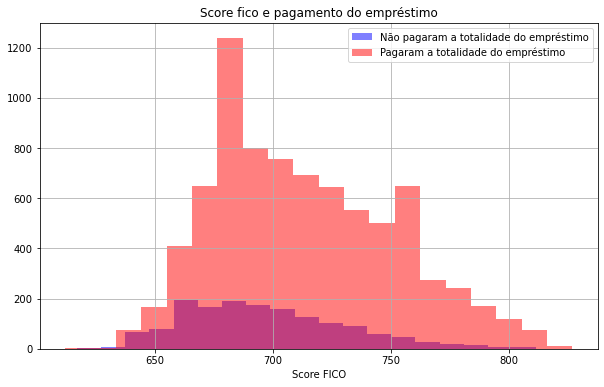

In [23]:
plt.figure(figsize=(10, 6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5, bins=20, 
                                        color='blue', label='Não pagaram a totalidade do empréstimo')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5, bins=20, 
                                        color='red', label='Pagaram a totalidade do empréstimo')
plt.title('Score fico e pagamento do empréstimo')
plt.legend()
plt.xlabel('Score FICO')

Text(0.5, 1.0, 'Motivo do empréstimo e e pagamento do empréstimo')

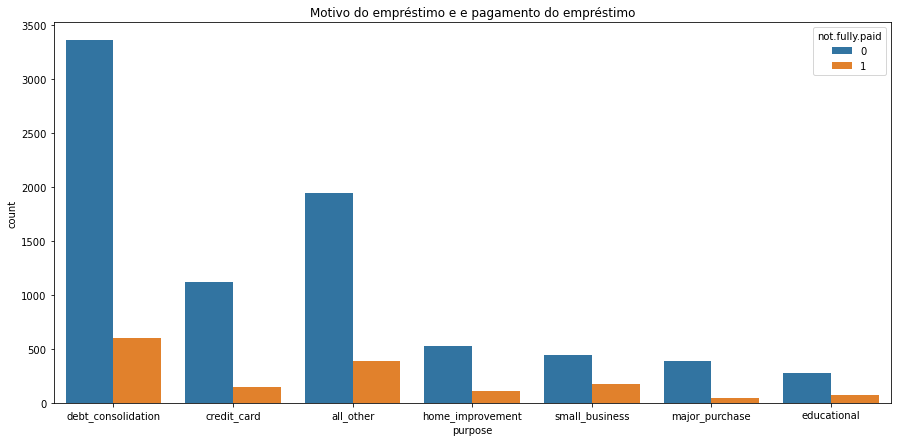

In [31]:
plt.figure(figsize=(15, 7))
sns.countplot(x='purpose', hue='not.fully.paid', data=df)
plt.title('Motivo do empréstimo e e pagamento do empréstimo')

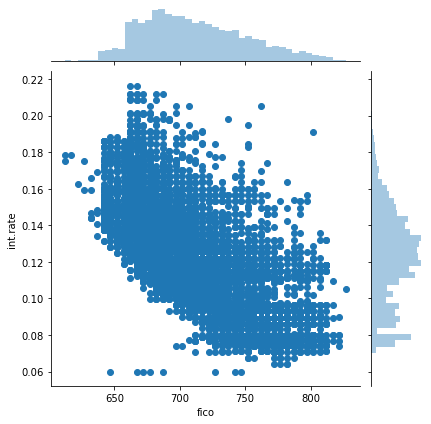

In [32]:
sns.jointplot(x='fico', y='int.rate', data=df)

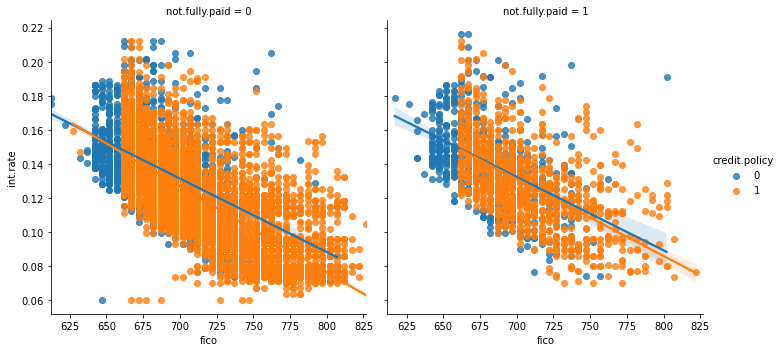

In [35]:
sns.lmplot(x='fico', y='int.rate', hue='credit.policy', 
           col='not.fully.paid', data=df)

Criando o modelo de classificação

Tratando variáveis categóricas

In [36]:
cat_columns = ['purpose']

In [47]:
df_final = pd.get_dummies(df, columns=cat_columns,
                         drop_first=True, prefix='dummies',
                         prefix_sep='_') 

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  dummies_credit_card         9578 

Divisão do dataset em treino e teste

In [71]:
from sklearn.model_selection import train_test_split

features = df_final.drop('not.fully.paid', axis='columns')
target = df_final['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, 
                                                    stratify=target, random_state=42)

Treinando o modelo de Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rfc = RandomForestClassifier(n_estimators=600, class_weight='balanced_subsample',
                             oob_score=True)

In [101]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=600,
                       oob_score=True)

In [104]:
rfc.oob_score_

0.8405429594272077

Previsão e Avaliação

In [93]:
y_pred = rfc.predict(X_test)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.62      0.01      0.02       460

    accuracy                           0.84      2874
   macro avg       0.73      0.50      0.47      2874
weighted avg       0.81      0.84      0.77      2874



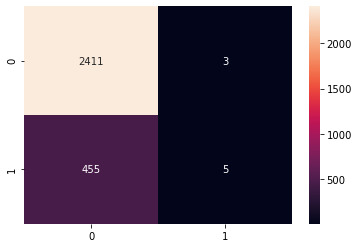

In [111]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')